<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Installation" data-toc-modified-id="Installation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Installation</a></span></li><li><span><a href="#Getting-some-resources" data-toc-modified-id="Getting-some-resources-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting some resources</a></span></li><li><span><a href="#Poking-around" data-toc-modified-id="Poking-around-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Poking around</a></span><ul class="toc-item"><li><span><a href="#df_store" data-toc-modified-id="df_store-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>df_store</a></span></li><li><span><a href="#Making-a-pdf-of-trajectories" data-toc-modified-id="Making-a-pdf-of-trajectories-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Making a pdf of trajectories</a></span></li><li><span><a href="#Demo-s-and-v" data-toc-modified-id="Demo-s-and-v-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Demo s and v</a></span></li><li><span><a href="#cstore" data-toc-modified-id="cstore-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>cstore</a></span></li><li><span><a href="#pstore" data-toc-modified-id="pstore-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>pstore</a></span></li></ul></li><li><span><a href="#Potential-Calculus-Experimentations" data-toc-modified-id="Potential-Calculus-Experimentations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Potential Calculus Experimentations</a></span></li></ul></div>

In [1]:
# %load_ext autoreload
# %autoreload 2

# Installation

You need to have python 3.7 to run this notebook.

You'll also find that you need some packages. You'll find that out when you run into an `ImportError`. Usually, you can figure google the missing package and find out how to install it. Usually it's just running `pip install THE_PACKAGE_YOU_WANT` in the terminal. 

But that only works for "pypi" published packages. Some of the following (my) packages are not published yet.

Here's how to install them (assuming you have python 3.7, pip, and git):

In your python (3.7) environment...

For py2store you can just do: ```pip install git+https://github.com/i2mint/py2store```

For ut and hyp you'll have to do a bit more:

Make a projects folder somewhere. Let's say you have it here: `~/py/proj`.

Now go to that folder:

```cd ~/py/proj```

Run `pwd` and copy the full path of the proj folder somewhere warm.

Now do this:

```git clone https://github.com/thorwhalen/ut```

Then

```git clone https://github.com/thorwhalen/hyp```

Then

```git clone https://github.com/thorwhalen/odus```

Now add that project folder you saved somewhere to your PYTHONPATH. How? LMGTFY:

https://stackoverflow.com/questions/3402168/permanently-add-a-directory-to-pythonpath


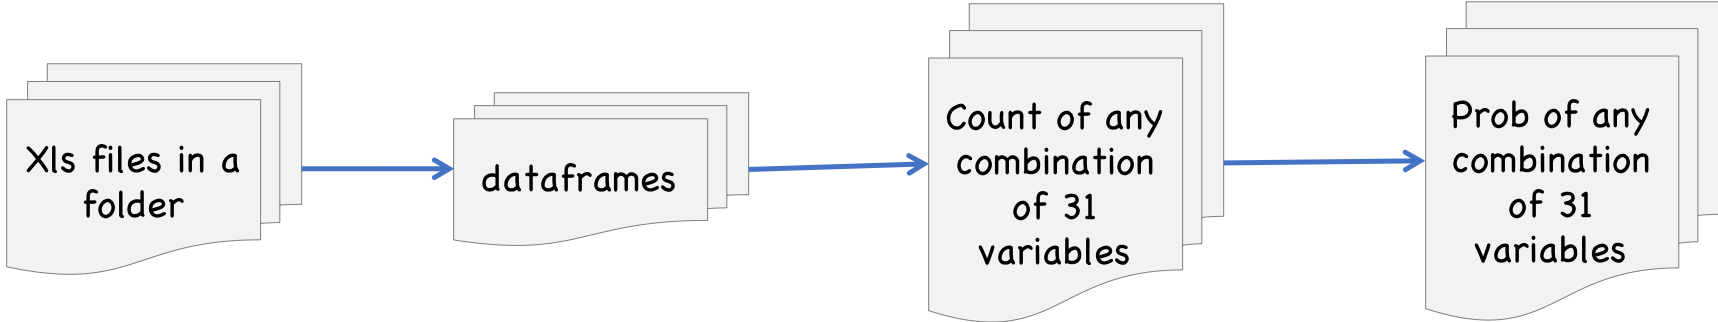

In [4]:
Image(filename = "odus_store.png", width=800, height=800)

# Getting some resources

In [1]:
from matplotlib.pylab import *
from numpy import *
import seaborn as sns

import os
from py2store.stores.local_store import RelativePathFormatStore
from py2store.mixins import ReadOnlyMixin
from py2store.base import Store
# from ut.util.imports.ipython_utils import *
# from ut.util.imports.data_analysis import *
from odus.analysis_utils import *

from io import BytesIO
from hyp.ppi.pot import Pot, ProbPot
from collections import UserDict, Counter
import numpy as np
import pandas as pd

from ut.ml.feature_extraction.sequential_var_sets import PVar, VarSet, DfData, VarSetFactory
from IPython.display import Image

# get odus at https://github.com/thorwhalen/odus
# Depends on https://github.com/thorwhalen/hyp too.
from odus.dacc import DfStore, counts_of_kps, Dacc, plot_life_course, VarSetCountsStore, \
    mk_pvar_struct, PotStore, _commun_columns_of_dfs, Struct, mk_pvar_str_struct, \
    VarStr

In [2]:
from odus import data_dir, data_path_of
survey_dir = data_dir
data_dir

'/D/Dropbox/dev/p3/proj/odus/odus/data'

In [3]:
df_store = DfStore(data_dir + '/{}.xlsx')
len(df_store)
cstore = VarSetCountsStore(df_store)
v = mk_pvar_struct(df_store, only_for_cols_in_all_dfs=True)
s = mk_pvar_str_struct(v)
f, df = cstore.df_store.head()
pstore = PotStore(df_store)


# Poking around

## df_store

A df_store is a key-value store where the key is the xls file and the value is the prepared dataframe

In [4]:
len(df_store)

119

In [5]:
it = iter(df_store.values())
for i in range(5):  # skip five first
    _ = next(it)
df = next(it)  # get the one I want
df.head(3)

category,RURAL,SUBURBAN,URBAN/CITY,HOMELESS,INCARCERATION,WORK,SON/DAUGHTER,SIBLING,FATHER/MOTHER,SPOUSE,...,METHAMPHETAMINE,AS PRESCRIBED OPIOID,NOT AS PRESCRIBED OPIOID,HEROIN,OTHER OPIOID,INJECTED,IN TREATMENT,Selects States below,Georgia,Pennsylvania
age,,,,,,,,,,,,,,,,,,,,,
11,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
12,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
13,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [6]:
print(df.columns.values)

['RURAL' 'SUBURBAN' 'URBAN/CITY' 'HOMELESS' 'INCARCERATION' 'WORK'
 'SON/DAUGHTER' 'SIBLING' 'FATHER/MOTHER' 'SPOUSE'
 'OTHER (WHO?, FILL IN BRACKETS HERE)' 'FRIEND USER' 'FRIEND NON USER'
 'MENTAL ILLNESS' 'PHYSICAL ILLNESS' 'LOSS OF LOVED ONE' 'TOBACCO'
 'MARIJUANA' 'ALCOHOL' 'HAL/LSD/XTC/CLUBDRUG' 'COCAINE/CRACK'
 'METHAMPHETAMINE' 'AS PRESCRIBED OPIOID' 'NOT AS PRESCRIBED OPIOID'
 'HEROIN' 'OTHER OPIOID' 'INJECTED' 'IN TREATMENT' 'Selects States below'
 'Georgia' 'Pennsylvania']


In [7]:
t = df[['ALCOHOL', 'TOBACCO']]
t.head(3)

category,ALCOHOL,TOBACCO
age,,
11,0,0
12,0,0
13,0,0


In [8]:
c = Counter()
for i, r in t.iterrows():
    c.update([tuple(r.to_list())])
c

Counter({(0, 0): 6, (1, 0): 4, (1, 1): 9, (0, 1): 2})

In [9]:
def count_tuples(dataframe):
    c = Counter()
    for i, r in dataframe.iterrows():
        c.update([tuple(r.to_list())])
    return c

In [10]:
fields = ['ALCOHOL', 'TOBACCO']
# do it for every one
c = Counter()
for df in df_store.values():
    c.update(count_tuples(df[fields]))
c

Counter({(0, 1): 903, (1, 1): 1343, (0, 0): 240, (1, 0): 179})

In [11]:
pd.Series(c)

0  1     903
1  1    1343
0  0     240
1  0     179
dtype: int64

In [12]:
# Powerful! You can use that with several pairs and get some nice probabilities. Look up Naive Bayes.

## Making a pdf of trajectories

In [13]:
import itertools
from functools import partial
from ut.pimg.utils import write_images

ihead = lambda it: itertools.islice(it, 0, 5)

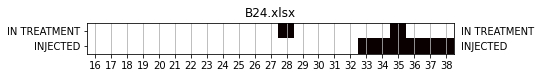

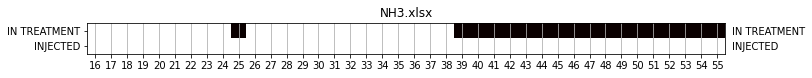

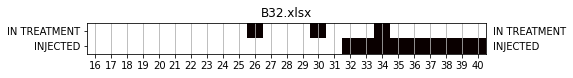

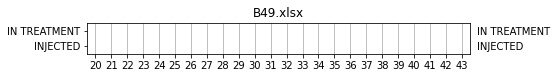

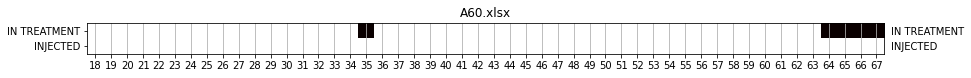

In [14]:
fields = [s.in_treatment, s.injected]

def plot_life(df, fields=None, title=None, ax=None):
    if fields is None:
        fields = slice(None,None)
    plot_life_course(df[fields], ax=ax);
    plt.grid(which='both', axis='x')
    if title is not None:
        plt.title(title)
        plt.gca().xaxis.set_tick_params(labeltop=False, labelbottom=True)
        
axs = list()
for k, df in itertools.islice(df_store.items(), 0, 5):
    plot_life(df, fields, title=k.split('/')[1])
    axs.append(plt.gca())

In [15]:
def write_trajectories_to_file(df_store, fields=None, fp='test.pdf', pil_write_format=None,
                               to_pil_image_kwargs=None, **pil_save_kwargs):
    def figs():
#         fig_gen = map(lambda k, df: plot_life(df, fields, title=k.split('/')[1]), *zip(*df_store.items()))
        fig_gen = map(lambda k, df: plot_life(df, fields, title=k.split('/')[1]), *ihead(zip(*df_store.items())))
        for _ in fig_gen:
            fig = plt.gcf()
            yield fig
            fig.clear()
        
    write_images(figs(), fp, pil_write_format, to_pil_image_kwargs, **pil_save_kwargs)


5

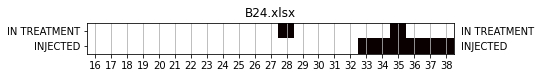

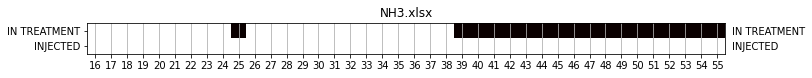

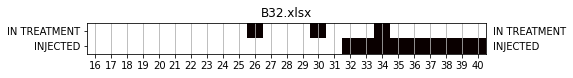

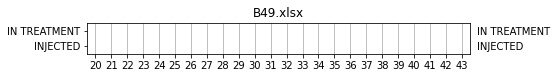

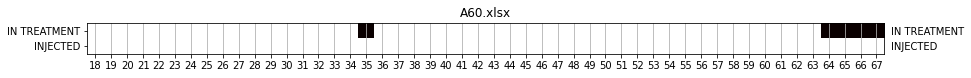

In [16]:
fig_gen = map(lambda k, df: plot_life(df, fields, title=k.split('/')[1]), *(zip(*ihead(df_store.items()))))
len(list(fig_gen))

In [17]:
# write_trajectories_to_file(df_store, fp='test.pdf')

In [18]:
np.hstack(([False], array(cumsum(df[s.injected]) > 0)[:-1]))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

surveys/A21.xlsx


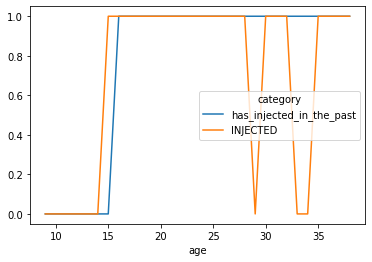

In [19]:
k, df = next(itertools.islice(df_store.items(), 7, 100))
print(k)
df['has_injected_in_the_past'] = np.hstack(([False], array(cumsum(df[s.injected]) > 0)[:-1])).astype(int)
# plot(df[s.injected], 'r-')
# plot('bo')
df[['has_injected_in_the_past', s.injected]].plot()

## Demo s and v

In [21]:
print(list(filter(lambda x: not x.startswith('__'), dir(s))))

['alcohol', 'as_prescribed_opioid', 'cocaine_crack', 'father_mother', 'hal_lsd_xtc_clubdrug', 'heroin', 'homeless', 'in_treatment', 'incarceration', 'injected', 'loss_of_loved_one', 'marijuana', 'mental_illness', 'methamphetamine', 'not_as_prescribed_opioid', 'other_opioid', 'physical_illness', 'rural', 'sibling', 'son_daughter', 'suburban', 'tobacco', 'urban_city', 'work']


In [22]:
s.heroin

'HEROIN'

In [23]:
v.heroin

PVar('HEROIN', 0)

In [24]:
v.heroin - 1

PVar('HEROIN', -1)

## cstore

In [25]:
cstore[v.alcohol, v.tobacco]

Counter({(0, 1): 903, (1, 1): 1343, (0, 0): 240, (1, 0): 179})

In [26]:
cstore[v.alcohol, v.tobacco, v.heroin]

Counter({(0, 0, 1): 427,
         (1, 0, 1): 656,
         (1, 1, 1): 687,
         (0, 0, 0): 189,
         (0, 1, 1): 476,
         (0, 1, 0): 51,
         (1, 0, 0): 133,
         (1, 1, 0): 46})

In [27]:
cstore[v.alcohol-1, v.alcohol]

Counter({(0, 0): 994, (1, 1): 1375, (1, 0): 90, (0, 1): 87})

In [28]:
cstore[v.alcohol-1, v.alcohol, v.tobacco]

Counter({(0, 0, 1): 807,
         (1, 1, 1): 1220,
         (1, 0, 0): 26,
         (0, 1, 1): 76,
         (0, 0, 0): 187,
         (1, 1, 0): 155,
         (0, 1, 0): 11,
         (1, 0, 1): 64})

## pstore

In [29]:
t = pstore[s.alcohol-1, s.alcohol]
t

                   pval
ALCOHOL-1 ALCOHOL      
0         0         994
          1          87
1         0          90
          1        1375

In [30]:
t.tb

,ALCOHOL-1,ALCOHOL,pval
,0,0,994
,0,1,87
,1,0,90
,1,1,1375


In [31]:
t / []

                       pval
ALCOHOL-1 ALCOHOL          
0         0        0.390416
          1        0.034171
1         0        0.035350
          1        0.540063

In [32]:
t / t[s.alcohol-1]

                       pval
ALCOHOL-1 ALCOHOL          
0         0        0.919519
          1        0.080481
1         0        0.061433
          1        0.938567

In [33]:
tt = pstore[s.alcohol, s.tobacco]
tt

                 pval
ALCOHOL TOBACCO      
0       0         240
        1         903
1       0         179
        1        1343

In [34]:
tt / tt[s.alcohol]

                     pval
ALCOHOL TOBACCO          
0       0        0.209974
        1        0.790026
1       0        0.117608
        1        0.882392

In [35]:
tt / tt[s.tobacco]

                     pval
ALCOHOL TOBACCO          
0       0        0.572792
1       0        0.427208
0       1        0.402048
1       1        0.597952

# Potential Calculus Experimentations

In [36]:
# survey_dir = '/D/Dropbox/others/Miriam/python/ProcessedSurveys'
df_store = DfStore(survey_dir + '/{}.xlsx')
len(df_store)

119

In [37]:
cstore = VarSetCountsStore(df_store)
v = mk_pvar_struct(df_store, only_for_cols_in_all_dfs=True)
s = mk_pvar_str_struct(v)
f, df = cstore.df_store.head()
df.head(3)

category,RURAL,SUBURBAN,URBAN/CITY,HOMELESS,INCARCERATION,WORK,SON/DAUGHTER,SIBLING,FATHER/MOTHER,SPOUSE,...,HAL/LSD/XTC/CLUBDRUG,COCAINE/CRACK,METHAMPHETAMINE,AS PRESCRIBED OPIOID,NOT AS PRESCRIBED OPIOID,HEROIN,OTHER OPIOID,INJECTED,IN TREATMENT,Massachusetts
age,,,,,,,,,,,,,,,,,,,,,
16,0,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
17,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
18,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
cstore = VarSetCountsStore(df_store)
cstore.mk_pvar_attrs()

In [39]:
from odus.dacc import DfStore, counts_of_kps, Dacc, plot_life_course, VarSetCountsStore, mk_pvar_struct, PotStore
pstore = PotStore(df_store)
pstore.mk_pvar_attrs()
p = pstore[v.homeless - 1, v.incarceration]
p

                          pval
HOMELESS-1 INCARCERATION      
0          0              1690
           1               577
1          0               192
           1                87

In [40]:
p / []

                              pval
HOMELESS-1 INCARCERATION          
0          0              0.663786
           1              0.226630
1          0              0.075412
           1              0.034171

In [41]:
pstore[v.incarceration]

               pval
INCARCERATION      
0              1989
1               676

In [42]:
pstore[v.alcohol-1, v.loss_of_loved_one]

                             pval
ALCOHOL-1 LOSS OF LOVED ONE      
0         0                   990
          1                    91
1         0                  1321
          1                   144

In [43]:
tw = pstore[v.tobacco, v.work]
mw = pstore[v.marijuana, v.work]
aw = pstore[v.alcohol, v.work]
w = pstore[v.work]


In [44]:
evid_t = Pot.from_hard_evidence(**{s.tobacco: 1})
evid_m = Pot.from_hard_evidence(**{s.marijuana: 1})
evid_a = Pot.from_hard_evidence(**{s.alcohol: 1})
evid_a

         pval
ALCOHOL      
1           1

In [45]:
aw

              pval
ALCOHOL WORK      
0       0      431
        1      712
1       0      448
        1     1074

In [46]:
w / []

          pval
WORK          
0     0.329831
1     0.670169

In [47]:
(evid_m * mw) / []

                    pval
MARIJUANA WORK          
1         0     0.350603
          1     0.649397

In [48]:
(evid_t * tw) / []

                  pval
TOBACCO WORK          
1       0     0.313001
        1     0.686999

In [49]:
(evid_a * aw) / []

                 pval
ALCOHOL WORK         
1       0     0.29435
        1     0.70565